In [19]:
# This code to detect and classify the syringe pack printing pattern and diffrentiate between the good( blue printing ) and the rejected ( black printng )

In [1]:
import keras
import os
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator


In [2]:
train = ImageDataGenerator(shear_range= 0.2,zoom_range=0.2, rotation_range=20) # shear_range : Prespective angle
train_batches = train.flow_from_directory(directory= "/content/drive/MyDrive/Ai and ML/Good_Bad_Syringes_Separate_Folders/Camera2/Training/Back",target_size=(224,224), classes= ["Bad","Good"],batch_size=2)

valid = ImageDataGenerator() # shear_range : Prespective angle
valid_batches = train.flow_from_directory(directory= "/content/drive/MyDrive/Ai and ML/Good_Bad_Syringes_Separate_Folders/Camera2/Validation/Back",target_size=(224,224), classes= ["Bad","Good"],batch_size=2)
print(len(train_batches))

Found 257 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
129


In [3]:
model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters= 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D( filters= 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D( pool_size= (2,2), strides= (2,2)))

model.add(Conv2D( filters= 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D( filters= 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D( pool_size= (2,2), strides= (2,2)))

model.add(Conv2D( filters= 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D( filters= 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D( filters= 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D( pool_size= (2,2), strides= (2,2)))

model.add(Conv2D( filters= 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D( filters= 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D( filters= 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D( pool_size= (2,2), strides= (2,2)))

model.add(Conv2D( filters= 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D( filters= 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D( filters= 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPooling2D( pool_size= (2,2), strides= (2,2)))

model.add(Flatten())

model.add(Dense(units= 4096, activation = "relu"))
model.add(Dense(units= 4096, activation = "relu"))

model.add(Dense(units= 2, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [4]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

model.compile(optimizer = Adam(lr=0.01),loss= categorical_crossentropy, metrics=["accuracy"])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
from keras.callbacks import ModelCheckpoint   # to save the results in every iteration

checkpoint = ModelCheckpoint("vgg16.h5",monitor="val_loss", save_best_only= True, mode= "auto",period=1) # Period : Saving period

model.fit_generator(generator=train_batches, steps_per_epoch=len(train_batches),validation_data= valid_batches, validation_steps=len(valid_batches),epochs=10,callbacks=[checkpoint] )

<ipython-input-5-8fdbb489dcca>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_batches, steps_per_epoch=len(train_batches),validation_data= valid_batches, validation_steps=len(valid_batches),epochs=10,callbacks=[checkpoint] )


Epoch 1/10
129/129 [==============================] - 59s 337ms/step - loss: 19690559488.0000 - accuracy: 0.6187 - val_loss: 0.7722 - val_accuracy: 0.6364
Epoch 2/10
129/129 [==============================] - 18s 141ms/step - loss: 0.5174 - accuracy: 0.8366 - val_loss: 0.7226 - val_accuracy: 0.6364
Epoch 3/10
129/129 [==============================] - 11s 84ms/step - loss: 0.4804 - accuracy: 0.8210 - val_loss: 0.7260 - val_accuracy: 0.6364
Epoch 4/10
129/129 [==============================] - 10s 79ms/step - loss: 0.4901 - accuracy: 0.8366 - val_loss: 1.0637 - val_accuracy: 0.6364
Epoch 5/10
129/129 [==============================] - 11s 82ms/step - loss: 0.5271 - accuracy: 0.7821 - val_loss: 0.9406 - val_accuracy: 0.6364
Epoch 6/10
129/129 [==============================] - 11s 82ms/step - loss: 0.4855 - accuracy: 0.8366 - val_loss: 1.3675 - val_accuracy: 0.6364
Epoch 7/10
129/129 [==============================] - 11s 84ms/step - loss: 0.5293 - accuracy: 0.8366 - val_loss: 1.3003 - v

In [6]:
import matplotlib.pyplot as plt
from keras.utils import load_img
import numpy as np

#img = load_img("/content/drive/MyDrive/Ai and ML/Good_Bad_Syringes_Separate_Folders/Camera2/Testing/Back/367.bmp",target_size=(224,224,3)) # Bad
img = load_img("/content/drive/MyDrive/Ai and ML/Good_Bad_Syringes_Separate_Folders/Camera2/Testing/Back/630.bmp",target_size=(224,224,3)) # Bad
#img = load_img("/content/drive/MyDrive/Ai and ML/Good_Bad_Syringes_Separate_Folders/Camera2/Testing/Back/403.bmp",target_size=(224,224,3)) # Good

img = np.asarray(img)  # convert the images to array
print(img.shape)

img = np.expand_dims(img, axis=0) # adding the index of the batch 
print(img.shape)

output = model.predict(img)
print(output)    # array output 0=False 1=True

(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 288ms/step
[[0.41506433 0.63538516]]


Accepted


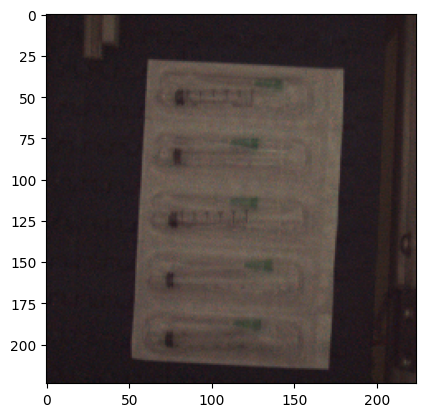

In [7]:
if output[0][0]> output[0][1]:
    print("Rejected")
else:
    print("Accepted")

plt.imshow(img[0])

In [18]:
# The classification is not good enough and needs more training phot to decide

In [7]:
# VGG-16

In [8]:
from keras.applications.vgg16 import VGG16
vgg_16 = VGG16()
vgg_16.summary()

553467096/553467096 [==============================] - 18s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [9]:
transferred_model = Sequential()

for layer in vgg_16.layers[:-3]:
    transferred_model.add(layer)

for layer in transferred_model.layers:
    layer.trainable = False

transferred_model.add(Dense(4096, activation= "relu"))
transferred_model.add(Dense(4096, activation= "relu"))
transferred_model.add(Dense(2, activation = "sigmoid"))


transferred_model.compile(optimizer = Adam(lr=0.01),loss= categorical_crossentropy, metrics=["accuracy"])
transferred_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [10]:
transferred_model.fit_generator(generator=train_batches, steps_per_epoch=len(train_batches),validation_data= valid_batches, validation_steps=len(valid_batches),epochs=10,callbacks=[checkpoint])

<ipython-input-10-eec6203ade40>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  transferred_model.fit_generator(generator=train_batches, steps_per_epoch=len(train_batches),validation_data= valid_batches, validation_steps=len(valid_batches),epochs=10,callbacks=[checkpoint])


Epoch 1/10
129/129 [==============================] - 8s 54ms/step - loss: 12894.3379 - accuracy: 0.8444 - val_loss: 105.3560 - val_accuracy: 0.8182
Epoch 2/10
129/129 [==============================] - 8s 62ms/step - loss: 113.6309 - accuracy: 0.9339 - val_loss: 13.1907 - val_accuracy: 0.9091
Epoch 3/10
129/129 [==============================] - 6s 48ms/step - loss: 168.5591 - accuracy: 0.9105 - val_loss: 222.0013 - val_accuracy: 0.8636
Epoch 4/10
129/129 [==============================] - 15s 117ms/step - loss: 69.4309 - accuracy: 0.9455 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
129/129 [==============================] - 8s 62ms/step - loss: 12.9242 - accuracy: 0.9922 - val_loss: 4.7085 - val_accuracy: 0.9545
Epoch 6/10
129/129 [==============================] - 6s 49ms/step - loss: 12.9887 - accuracy: 0.9650 - val_loss: 43.3936 - val_accuracy: 0.9545
Epoch 7/10
129/129 [==============================] - 8s 60ms/step - loss: 142.0348 - accuracy: 0.9494 - val_loss: 0.00

In [15]:
import matplotlib.pyplot as plt
from keras.utils import load_img
import numpy as np

#img = load_img("/content/drive/MyDrive/Ai and ML/Good_Bad_Syringes_Separate_Folders/Camera2/Testing/Back/367.bmp",target_size=(224,224,3)) # Bad
#img = load_img("/content/drive/MyDrive/Ai and ML/Good_Bad_Syringes_Separate_Folders/Camera2/Testing/Back/630.bmp",target_size=(224,224,3)) # Bad
img = load_img("/content/drive/MyDrive/Ai and ML/Good_Bad_Syringes_Separate_Folders/Camera2/Testing/Back/403.bmp",target_size=(224,224,3)) # Good

img = np.asarray(img)  # convert the images to array
print(img.shape)

img = np.expand_dims(img, axis=0) # adding the index of the batch 
print(img.shape)

output = transferred_model.predict(img)
print(output)    # array output 0=False 1=True

(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
[[0. 1.]]


Accepted


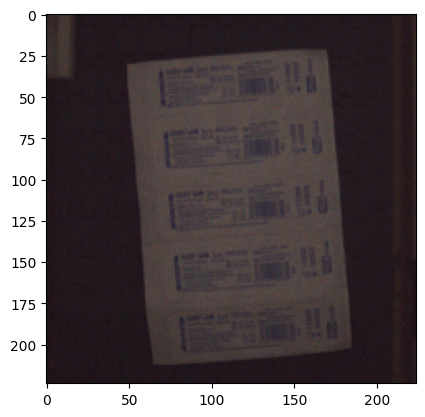

In [16]:
if output[0][0]> output[0][1]:
    print("Rejected")
else:
    print("Accepted")

plt.imshow(img[0])

In [ ]:
# The classification is much better on the same data